In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ogw3-loaded/data_frames_ogw3.pkl
/kaggle/input/ogw3-augmented/X_damage_augmented.npy
/kaggle/input/ogw3-augmented/X_freq_augmented.npy
/kaggle/input/ogw3-augmented/X_signals_augmented.npy
/kaggle/input/ogw3-train-test/test_dataset.npz
/kaggle/input/ogw3-train-test/train_dataset.npz


# 1. Data Loading and Preprocessing 

In [3]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt


In [2]:
%pwd

'/kaggle/working'

In [6]:
os.chdir("..")

In [7]:
%pwd

'/kaggle'

In [8]:

%pwd

'/kaggle'

In [9]:
os.chdir("input")

In [10]:
obj=pd.read_pickle('ogw3-loaded/data_frames_ogw3.pkl')

In [11]:
for k, v in obj.items():
    print(k)
    print(v.shape)
    break

data_all_20191121T101124_D3_S5_R2_200kHz.csv
(4369, 66)


In [12]:
len(obj)

2580

In [13]:
baseline_data={}
damage_data={}


In [14]:
# Define the columns to extract (0-based indexing)
# columns_to_extract = [26, 34, 27, 35]  # Columns 27, 35, 28, 36 in 1-based indexing
columns_to_extract = [26]  # Columns 27 in 1-based indexing



In [15]:
# Iterate through the items in the original dictionary
for k, v in obj.items():
    if 'baseline' in k:
        # Check if v is a Pandas DataFrame or NumPy array
        if isinstance(v, pd.DataFrame):
            filtered_data = v.iloc[:, columns_to_extract]  # Use .iloc for Pandas DataFrame
        else:
            filtered_data = v[:, columns_to_extract]  # Use NumPy slicing for arrays
        
        # Store the filtered data in the baseline dictionary
        baseline_data[k] = filtered_data
        
        # Print dimensions for baseline data
        #print(f"Baseline key: {k}, Data shape: {filtered_data.shape}")

    elif 'D1' in k:  # Filter for D1
        # Check if v is a Pandas DataFrame or NumPy array
        if isinstance(v, pd.DataFrame):
            filtered_data = v.iloc[:, columns_to_extract]  # Use .iloc for Pandas DataFrame
        else:
            filtered_data = v[:, columns_to_extract]  # Use NumPy slicing for arrays
        
        # Extract damage size from the key (number after 'S')
        # Split the key by underscores and find the part starting with 'S'
        damage_size_part = [part for part in k.split('_') if part.startswith('S')][0]
        damage_size = int(damage_size_part[1:])  # Extract the number after 'S'
        
        # Store the filtered data and damage size in the damage dictionary
        damage_data[k] = {
            'data': filtered_data,
            'damage_size': damage_size
        }
        
        # Print dimensions for damage data
        #print(f"Damage key: {k}, Data shape: {filtered_data.shape}, Damage size: {damage_size}")


In [16]:
len(baseline_data)

240

In [17]:
print(len(damage_data))

780


In [18]:
# Initialize lists to store all samples and labels
X_all = []
y_all = []

# Add baseline samples
for k, v in baseline_data.items():
    X_all.append(v)  # Shape: (4369, 1)
    y_all.append(0)  # Label for baseline

# Add damage samples
for k, v in damage_data.items():
    X_all.append(v['data'])  # Shape: (4369, 1)
    y_all.append(v['damage_size'])  # Label for damage

# Convert lists to NumPy arrays
X_all = np.array(X_all)  # Shape: (num_samples, 4369, 4)
y_all = np.array(y_all)  # Shape: (num_samples,)

In [19]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_all, y_all, test_size=0.2, random_state=42
)

# Print shapes for verification
print(f"Training data shape: {X_train.shape}")  # Should be (num_samples * 0.8, 4369, 4)
print(f"Training labels shape: {y_train.shape}")  # Should be (num_samples * 0.8,)
print(f"Test data shape: {X_test.shape}")  # Should be (num_samples * 0.2, 4369, 4)
print(f"Test labels shape: {y_test.shape}")  # Should be (num_samples * 0.2,)

Training data shape: (816, 4369, 1)
Training labels shape: (816,)
Test data shape: (204, 4369, 1)
Test labels shape: (204,)


In [20]:
def print_label_distribution(y, set_name):
    """Print the distribution of labels in a dataset."""
    print(f"\n{set_name} label distribution:")
    print(f"- Baseline samples (0): {np.sum(y == 0)}")
    for damage_size in range(1, 14):
        print(f"- Damage size {damage_size}: {np.sum(y == damage_size)}")

In [21]:
# Print label distribution for training and test sets
print_label_distribution(y_train, "Training set")
print_label_distribution(y_test, "Test set")


Training set label distribution:
- Baseline samples (0): 197
- Damage size 1: 47
- Damage size 2: 50
- Damage size 3: 52
- Damage size 4: 46
- Damage size 5: 49
- Damage size 6: 43
- Damage size 7: 48
- Damage size 8: 44
- Damage size 9: 49
- Damage size 10: 49
- Damage size 11: 48
- Damage size 12: 45
- Damage size 13: 49

Test set label distribution:
- Baseline samples (0): 43
- Damage size 1: 13
- Damage size 2: 10
- Damage size 3: 8
- Damage size 4: 14
- Damage size 5: 11
- Damage size 6: 17
- Damage size 7: 12
- Damage size 8: 16
- Damage size 9: 11
- Damage size 10: 11
- Damage size 11: 12
- Damage size 12: 15
- Damage size 13: 11


In [22]:
%pwd

'/kaggle/input'

In [23]:
os.chdir("..")
os.chdir("working")

In [24]:
np.savez("train_dataset_D1.npz", X=X_train, y=y_train)
np.savez("test_dataset_D1.npz", X=X_test, y=y_test)

# 2. Execution and model Training
This is where the actual execution starts

In [27]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import os

In [2]:
os.chdir("..")
os.chdir("working")

In [3]:
os.chdir("..")
%pwd

'/kaggle'

In [4]:
os.chdir('input/ogw3-train-test')

array([[ 0.0065435 ],
       [ 0.0077284 ],
       [ 0.0057143 ],
       ...,
       [-0.0017008 ],
       [ 0.0015802 ],
       [-0.00081934]])

In [28]:

# Load training dataset
train_data = np.load("train_dataset_D1.npz")
X_train = train_data["X"]  # Load features
y_train = train_data["y"]  # Load labels

# Load test dataset
test_data = np.load("test_dataset_D1.npz")
X_test = test_data["X"]  # Load features
y_test = test_data["y"]  # Load labels

# Verify shapes
print(f"Training data shape: {X_train.shape}")  # Should be (num_samples, 4369, 4)
print(f"Training labels shape: {y_train.shape}")  # Should be (num_samples,)
print(f"Test data shape: {X_test.shape}")  # Should be (num_samples, 4369, 4)
print(f"Test labels shape: {y_test.shape}")  # Should be (num_samples,)

Training data shape: (816, 4369, 1)
Training labels shape: (816,)
Test data shape: (204, 4369, 1)
Test labels shape: (204,)


In [29]:
def print_label_distribution(y, set_name):
    """Print the distribution of labels in a dataset."""
    print(f"\n{set_name} label distribution:")
    print(f"- Baseline samples (0): {np.sum(y == 0)}")
    for damage_size in range(1, 14):
        print(f"- Damage size {damage_size}: {np.sum(y == damage_size)}")

In [30]:
# Print label distribution for training and test sets
print_label_distribution(y_train, "Training set")
print_label_distribution(y_test, "Test set")


Training set label distribution:
- Baseline samples (0): 197
- Damage size 1: 47
- Damage size 2: 50
- Damage size 3: 52
- Damage size 4: 46
- Damage size 5: 49
- Damage size 6: 43
- Damage size 7: 48
- Damage size 8: 44
- Damage size 9: 49
- Damage size 10: 49
- Damage size 11: 48
- Damage size 12: 45
- Damage size 13: 49

Test set label distribution:
- Baseline samples (0): 43
- Damage size 1: 13
- Damage size 2: 10
- Damage size 3: 8
- Damage size 4: 14
- Damage size 5: 11
- Damage size 6: 17
- Damage size 7: 12
- Damage size 8: 16
- Damage size 9: 11
- Damage size 10: 11
- Damage size 11: 12
- Damage size 12: 15
- Damage size 13: 11


In [31]:
import numpy as np

def min_max_scale(data):
    """Normalize each feature (column) to [0, 1]."""
    min_vals = np.min(data, keepdims=True)  # Min along time steps
    max_vals = np.max(data, keepdims=True)  # Max along time steps
    return (data - min_vals) / (max_vals - min_vals + 1e-8)  # Avoid division by zero


In [32]:
X_train_scaled = np.array([min_max_scale(sample) for sample in X_train])
X_test_scaled = np.array([min_max_scale(sample) for sample in X_test])


In [33]:
X_train=X_train_scaled
X_test=X_test_scaled

In [34]:
# Convert input data to float32
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [35]:
y_train = y_train.astype('int32')
y_test = y_test.astype('int32')

In [36]:
print("Min values after scaling:", np.min(X_train, axis=(1,2)))
print("Max values after scaling:", np.max(X_train, axis=(1,2)))

Min values after scaling: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 

[0.49249905]


In [41]:
print("X_train dtype:", X_train.dtype)  # Should print float32
print("y_train dtype:", y_train.dtype)  # Should print float32

X_train dtype: float32
y_train dtype: int32


# 3. Model Architecture

In [42]:
import tensorflow as tf
from tensorflow.keras import layers, models

In [43]:
tf.keras.backend.set_floatx('float32')

In [44]:
# Multi-GPU setup
strategy = tf.distribute.MirroredStrategy()


In [45]:
class AttentionPooling(layers.Layer):
    def __init__(self, output_dim=256):
        super().__init__()
        self.attention = layers.Dense(1, activation='sigmoid',
                                    kernel_initializer='glorot_uniform')
        self.projection = layers.Dense(output_dim, activation='relu')  # Project to higher dimension
        
    def call(self, inputs):
        # inputs shape: (batch_size, 874, 64)
        att_weights = self.attention(inputs)  # (batch_size, 874, 1)
        weighted_sum = tf.reduce_sum(inputs * att_weights, axis=1)  # (batch_size, 64)
        projected = self.projection(weighted_sum)  # (batch_size, 256)
        return projected

In [46]:
# Transformer Encoder Block
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    # Self Attention
    x = layers.MultiHeadAttention(
        key_dim=head_size, num_heads=num_heads, dropout=dropout
    )(inputs, inputs)
    x = layers.Dropout(dropout)(x)
    x = layers.LayerNormalization(epsilon=1e-6)(x + inputs)

    # Feed Forward Network
    y = layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(x)
    y = layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(y)
    y = layers.Dropout(dropout)(y)
    return layers.LayerNormalization(epsilon=1e-6)(y + x)


In [47]:
def build_regression_model(input_shape=(4369, 1)):
    inputs = layers.Input(shape=input_shape)

    # Initial Downsampling: 4369 → 874
    x = layers.MaxPooling1D(pool_size=5, strides=5, padding='same')(inputs)
    
    # Feature Embedding
    x = layers.Conv1D(16, 3, padding='same', activation='relu')(x)
    
    # Transformer Processing
    x = transformer_encoder(x, head_size=256, num_heads=8, ff_dim=128, dropout=0.3)
    x = transformer_encoder(x, head_size=256, num_heads=8, ff_dim=128, dropout=0.3)
    x = transformer_encoder(x, head_size=256, num_heads=8, ff_dim=128, dropout=0.3)
    x = transformer_encoder(x, head_size=256, num_heads=8, ff_dim=128, dropout=0.3)
    
    # Modified Attention-based Pooling
    x = AttentionPooling(output_dim=1024)(x)  # Output shape: (batch_size, 256)
    
    # Regression Head
    x = layers.Dense(256, activation='relu')(x)
    x = layers.Dropout(0.3)(x)
    outputs = layers.Dense(1, activation='linear')(x)
    
    return models.Model(inputs, outputs)

In [48]:
# Multi-GPU Setup and Compilation
strategy = tf.distribute.MirroredStrategy()


In [49]:
with strategy.scope():
    model = build_regression_model()
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
        loss=tf.keras.losses.Huber(delta=1.5),
        metrics=['mae', 'mse']
    )

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 4369, 1)        │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d             │ (None, 874, 1)         │              0 │ input_layer[0][0]      │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d (Conv1D)           │ (None, 874, 16)        │             64 │ max_pooling1d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multi_head_attention      │ (None, 874, 16)        │        137,232 │ conv1d[0][0],          │
│ (MultiHeadAttention)      │                        │                │ conv1d[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_1 (Dropout)       │ (None, 874, 16)        │              0 │ multi_head_attention[… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 874, 16)        │              0 │ dropout_1[0][0],       │
│                           │                        │                │ conv1d[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization       │ (None, 874, 16)        │             32 │ add[0][0]              │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_1 (Conv1D)         │ (None, 874, 128)       │          2,176 │ layer_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_2 (Conv1D)         │ (None, 874, 16)        │          2,064 │ conv1d_1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_2 (Dropout)       │ (None, 874, 16)        │              0 │ conv1d_2[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_1 (Add)               │ (None, 874, 16)        │              0 │ dropout_2[0][0],       │
│                           │                        │                │ layer_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_1     │ (None, 874, 16)        │             32 │ add_1[0][0]            │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multi_head_attention_1    │ (None, 874, 16)        │        137,232 │ layer_normalization_1… │
│ (MultiHeadAttention)      │                        │                │ layer_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_4 (Dropout)       │ (None, 874, 16)        │              0 │ multi_head_attention_… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_2 (Add)               │ (None, 874, 16)        │              0 │ dropout_4[0][0],       │
│                           │                        │                │ layer_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_2

 Total params: 846,290 (3.23 MB)

 Trainable params: 846,290 (3.23 MB)

 Non-trainable params: 0 (0.00 B)

In [50]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=200,
    batch_size=32,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_mae',
            patience=100,
            restore_best_weights=True
        ),
        # tf.keras.callbacks.ReduceLROnPlateau(
        #     monitor='val_mae',
        #     factor=0.5,
        #     patience=20
        # )
    ]
)

Epoch 1/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 37s 737ms/step - loss: 6.0753 - mae: 4.7592 - mse: 32.4763 - val_loss: 5.8769 - val_mae: 4.6371 - val_mse: 31.9229
Epoch 2/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 18s 689ms/step - loss: 5.1039 - mae: 4.1064 - mse: 23.5072 - val_loss: 5.4652 - val_mae: 4.3552 - val_mse: 27.4047
Epoch 3/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 19s 731ms/step - loss: 4.8545 - mae: 3.9438 - mse: 21.0833 - val_loss: 5.5109 - val_mae: 4.3845 - val_mse: 27.9043
Epoch 4/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 20s 776ms/step - loss: 5.0082 - mae: 4.0512 - mse: 22.4019 - val_loss: 5.0155 - val_mae: 4.0388 - val_mse: 22.5727
Epoch 5/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 22s 847ms/step - loss: 5.0839 - mae: 4.1008 - mse: 21.9122 - val_loss: 5.0868 - val_mae: 4.0709 - val_mse: 23.3232
Epoch 6/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 22s 855ms/step - loss: 4.9417 - mae: 3.9983 - mse: 20.8983 - val_loss: 5.4856 - val_mae: 4.3683 - val_mse: 27.6312
Epoch 7/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 21s 812ms/step - loss: 4.8967 - mae: 

# 4. Model Evaluation #

In [51]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [52]:
# Make predictions
y_pred = model.predict(X_test_scaled).flatten()

7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 409ms/step


In [54]:
# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"""
Performance Metrics:
- MAE: {mae:.3f}
- MSE: {mse:.3f}
- RMSE: {rmse:.3f}
- R²: {r2:.3f}
""")


Performance Metrics:
- MAE: 3.921
- MSE: 20.740
- RMSE: 4.554
- R²: -0.093



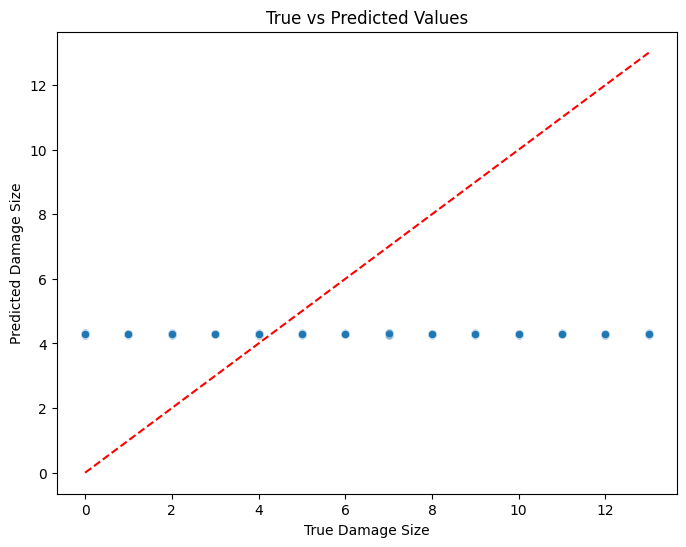

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([0,13], [0,13], 'r--')  # Perfect prediction line
plt.xlabel('True Damage Size')
plt.ylabel('Predicted Damage Size')
plt.title('True vs Predicted Values')
plt.show()

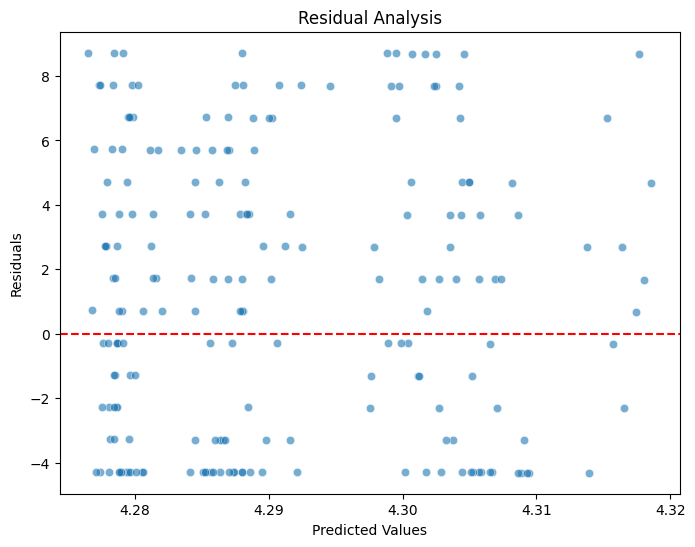

In [56]:
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Analysis')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


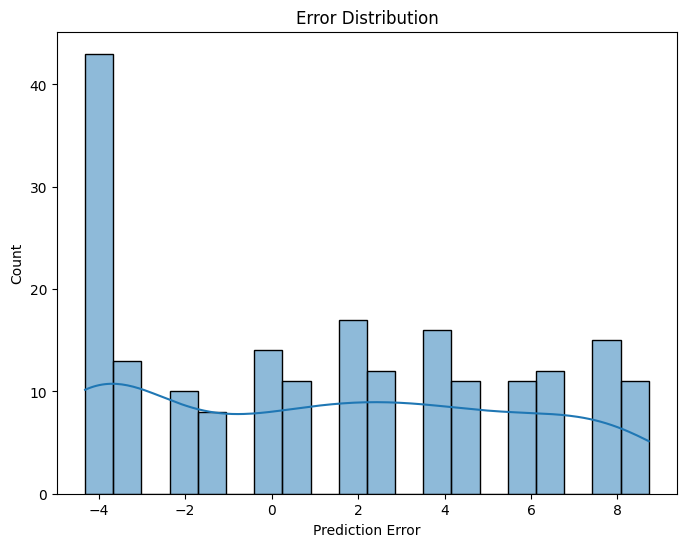

In [57]:
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=20)
plt.xlabel('Prediction Error')
plt.title('Error Distribution')
plt.show()

In [58]:
error_by_size = []
for size in np.unique(y_test):
    mask = y_test == size
    if sum(mask) > 0:  # Check if size exists in test set
        size_mae = mean_absolute_error(y_test[mask], y_pred[mask])
        error_by_size.append((size, size_mae))

# Convert to DataFrame for better visualization
import pandas as pd
error_df = pd.DataFrame(error_by_size, columns=['Damage Size', 'MAE'])
print("\nMAE by Damage Size:")
print(error_df)


MAE by Damage Size:
    Damage Size       MAE
0             0  4.291353
1             1  3.289523
2             2  2.290350
3             3  1.290223
4             4  0.289700
5             5  0.712287
6             6  1.705925
7             7  2.708490
8             8  3.709130
9             9  4.703802
10           10  5.716933
11           11  6.710085
12           12  7.709711
13           13  8.704775


In [59]:
# Separate baseline (label=0) and damage samples
baseline_mask = y_test == 0
damage_mask = y_test > 0

print(f"\nBaseline Performance (False Positives):")
print(f"- MAE: {mean_absolute_error(y_test[baseline_mask], y_pred[baseline_mask]):.3f}")

print(f"\nDamage Performance:")
print(f"- MAE: {mean_absolute_error(y_test[damage_mask], y_pred[damage_mask]):.3f}")


Baseline Performance (False Positives):
- MAE: 4.291

Damage Performance:
- MAE: 3.822


In [60]:
# Find samples with largest errors
worst_indices = np.argsort(np.abs(residuals))[-5:]  # Top 5 worst predictions

print("\nWorst Predictions:")
for idx in worst_indices:
    print(f"True: {y_test[idx]:.1f}, Predicted: {y_pred[idx]:.2f}, Error: {residuals[idx]:.2f}")


Worst Predictions:
True: 13.0, Predicted: 4.30, Error: 8.70
True: 13.0, Predicted: 4.29, Error: 8.71
True: 13.0, Predicted: 4.28, Error: 8.72
True: 13.0, Predicted: 4.28, Error: 8.72
True: 13.0, Predicted: 4.28, Error: 8.72
